In [1]:
# with 15 samples of orig. data getting 500 samples of syn data

# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm?scriptVersionId=112288982&cellId=6
# to learn:
# data.info(), data.describe()
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm?scriptVersionId=112288982&cellId=20
# to learn:
# Imbalncing Technique, StratifiedKFold (?)

# https://www.kaggle.com/code/ziadhamadafathy/classify-dry-bean-with-accuracy-90-by-some-models
# to learn:
# sns.countplot(df['Class']), df['Class'].value_counts()
# SelectKBest for feature reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
iris = pd.read_csv("syn_bean_10.csv")
x = iris.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].values
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2500 non-null   float64
 1   Perimeter        2500 non-null   float64
 2   MajorAxisLength  2500 non-null   float64
 3   MinorAxisLength  2500 non-null   float64
 4   AspectRation     2500 non-null   float64
 5   Eccentricity     2500 non-null   float64
 6   ConvexArea       2500 non-null   float64
 7   EquivDiameter    2500 non-null   float64
 8   Extent           2500 non-null   float64
 9   Solidity         2500 non-null   float64
 10  roundness        2500 non-null   float64
 11  Class            2500 non-null   object 
dtypes: float64(11), object(1)
memory usage: 234.5+ KB


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Class
0,32020.89,692.37,121.66,32.83,-270.97,352.65,32052.07,407.87,113.36,118.23,-101.74,SEKER
1,29657.82,594.88,704.12,640.93,-90.91,552.68,29505.91,1282.72,739.27,580.56,-267.61,SEKER
2,28810.09,1780.86,-86.10,-261.38,-1425.64,-977.69,31536.13,1902.43,1537.14,-135.68,88.28,SEKER
3,31039.14,859.60,283.90,327.89,134.62,4.64,31437.97,82.45,121.81,116.60,284.43,SEKER
4,32144.66,517.72,528.86,250.52,1164.43,-47.81,32699.93,891.07,214.84,150.69,-78.03,SEKER
5,31788.48,171.07,-1108.44,130.67,1134.45,43.90,33194.66,547.38,-390.89,128.86,-184.14,SEKER
6,31973.49,662.18,115.57,214.54,-41.38,-203.80,32236.23,221.48,-14.04,20.23,-196.35,SEKER
7,32021.66,780.71,-47.97,508.01,90.22,67.03,31722.70,-1.78,307.48,187.97,-70.19,SEKER
8,31832.82,601.23,38.78,161.10,-251.16,111.13,31963.08,56.05,15.19,-29.99,-92.36,SEKER
9,28288.23,658.76,169.73,278.66,-104.82,-89.05,28613.90,166.59,78.38,14.41,-92.96,SEKER


In [4]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Class,
BARBUNYA,500
BOMBAY,500
CALI,500
HOROZ,500
SEKER,500


In [5]:
iris_1=iris.loc[iris["Class"]=="SEKER"]
iris_2=iris.loc[iris["Class"]=="BARBUNYA"]
iris_3=iris.loc[iris["Class"]=="BOMBAY"]
iris_4=iris.loc[iris["Class"]=="CALI"]
iris_5=iris.loc[iris["Class"]=="HOROZ"]

/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users

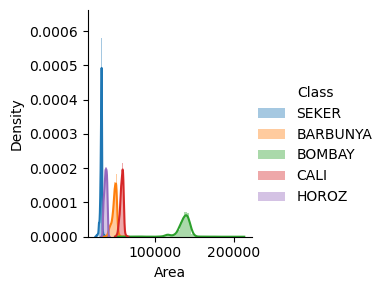

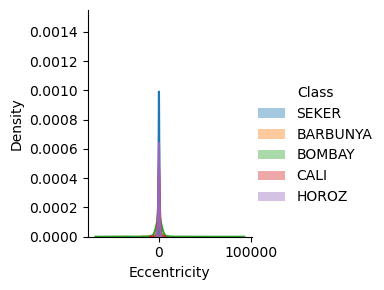

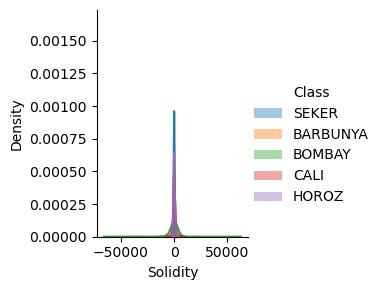

In [6]:
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Area").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Eccentricity").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Solidity").add_legend()
plt.show()

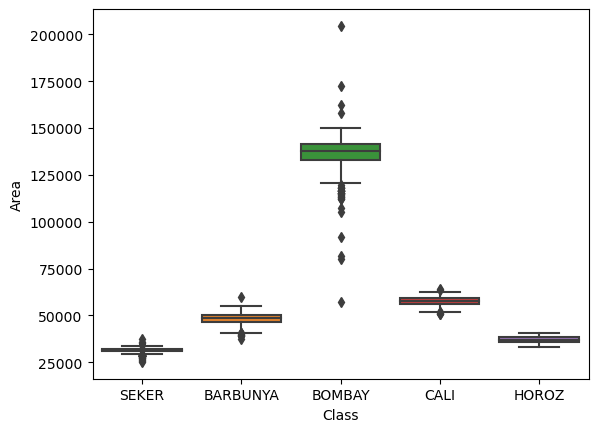

In [7]:
sns.boxplot(x="Class",y="Area",data=iris)
plt.show()

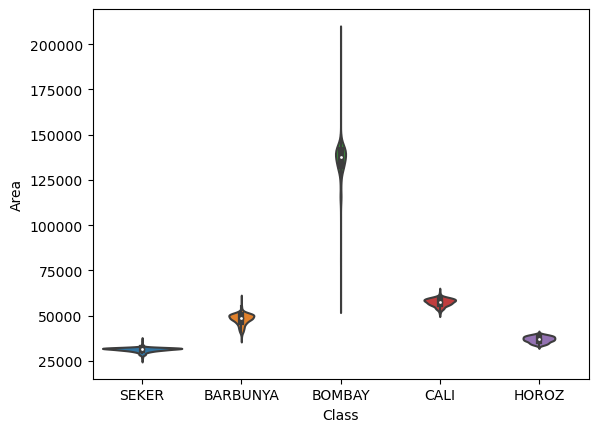

In [8]:
sns.violinplot(x="Class",y="Area",data=iris)
plt.show()

/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


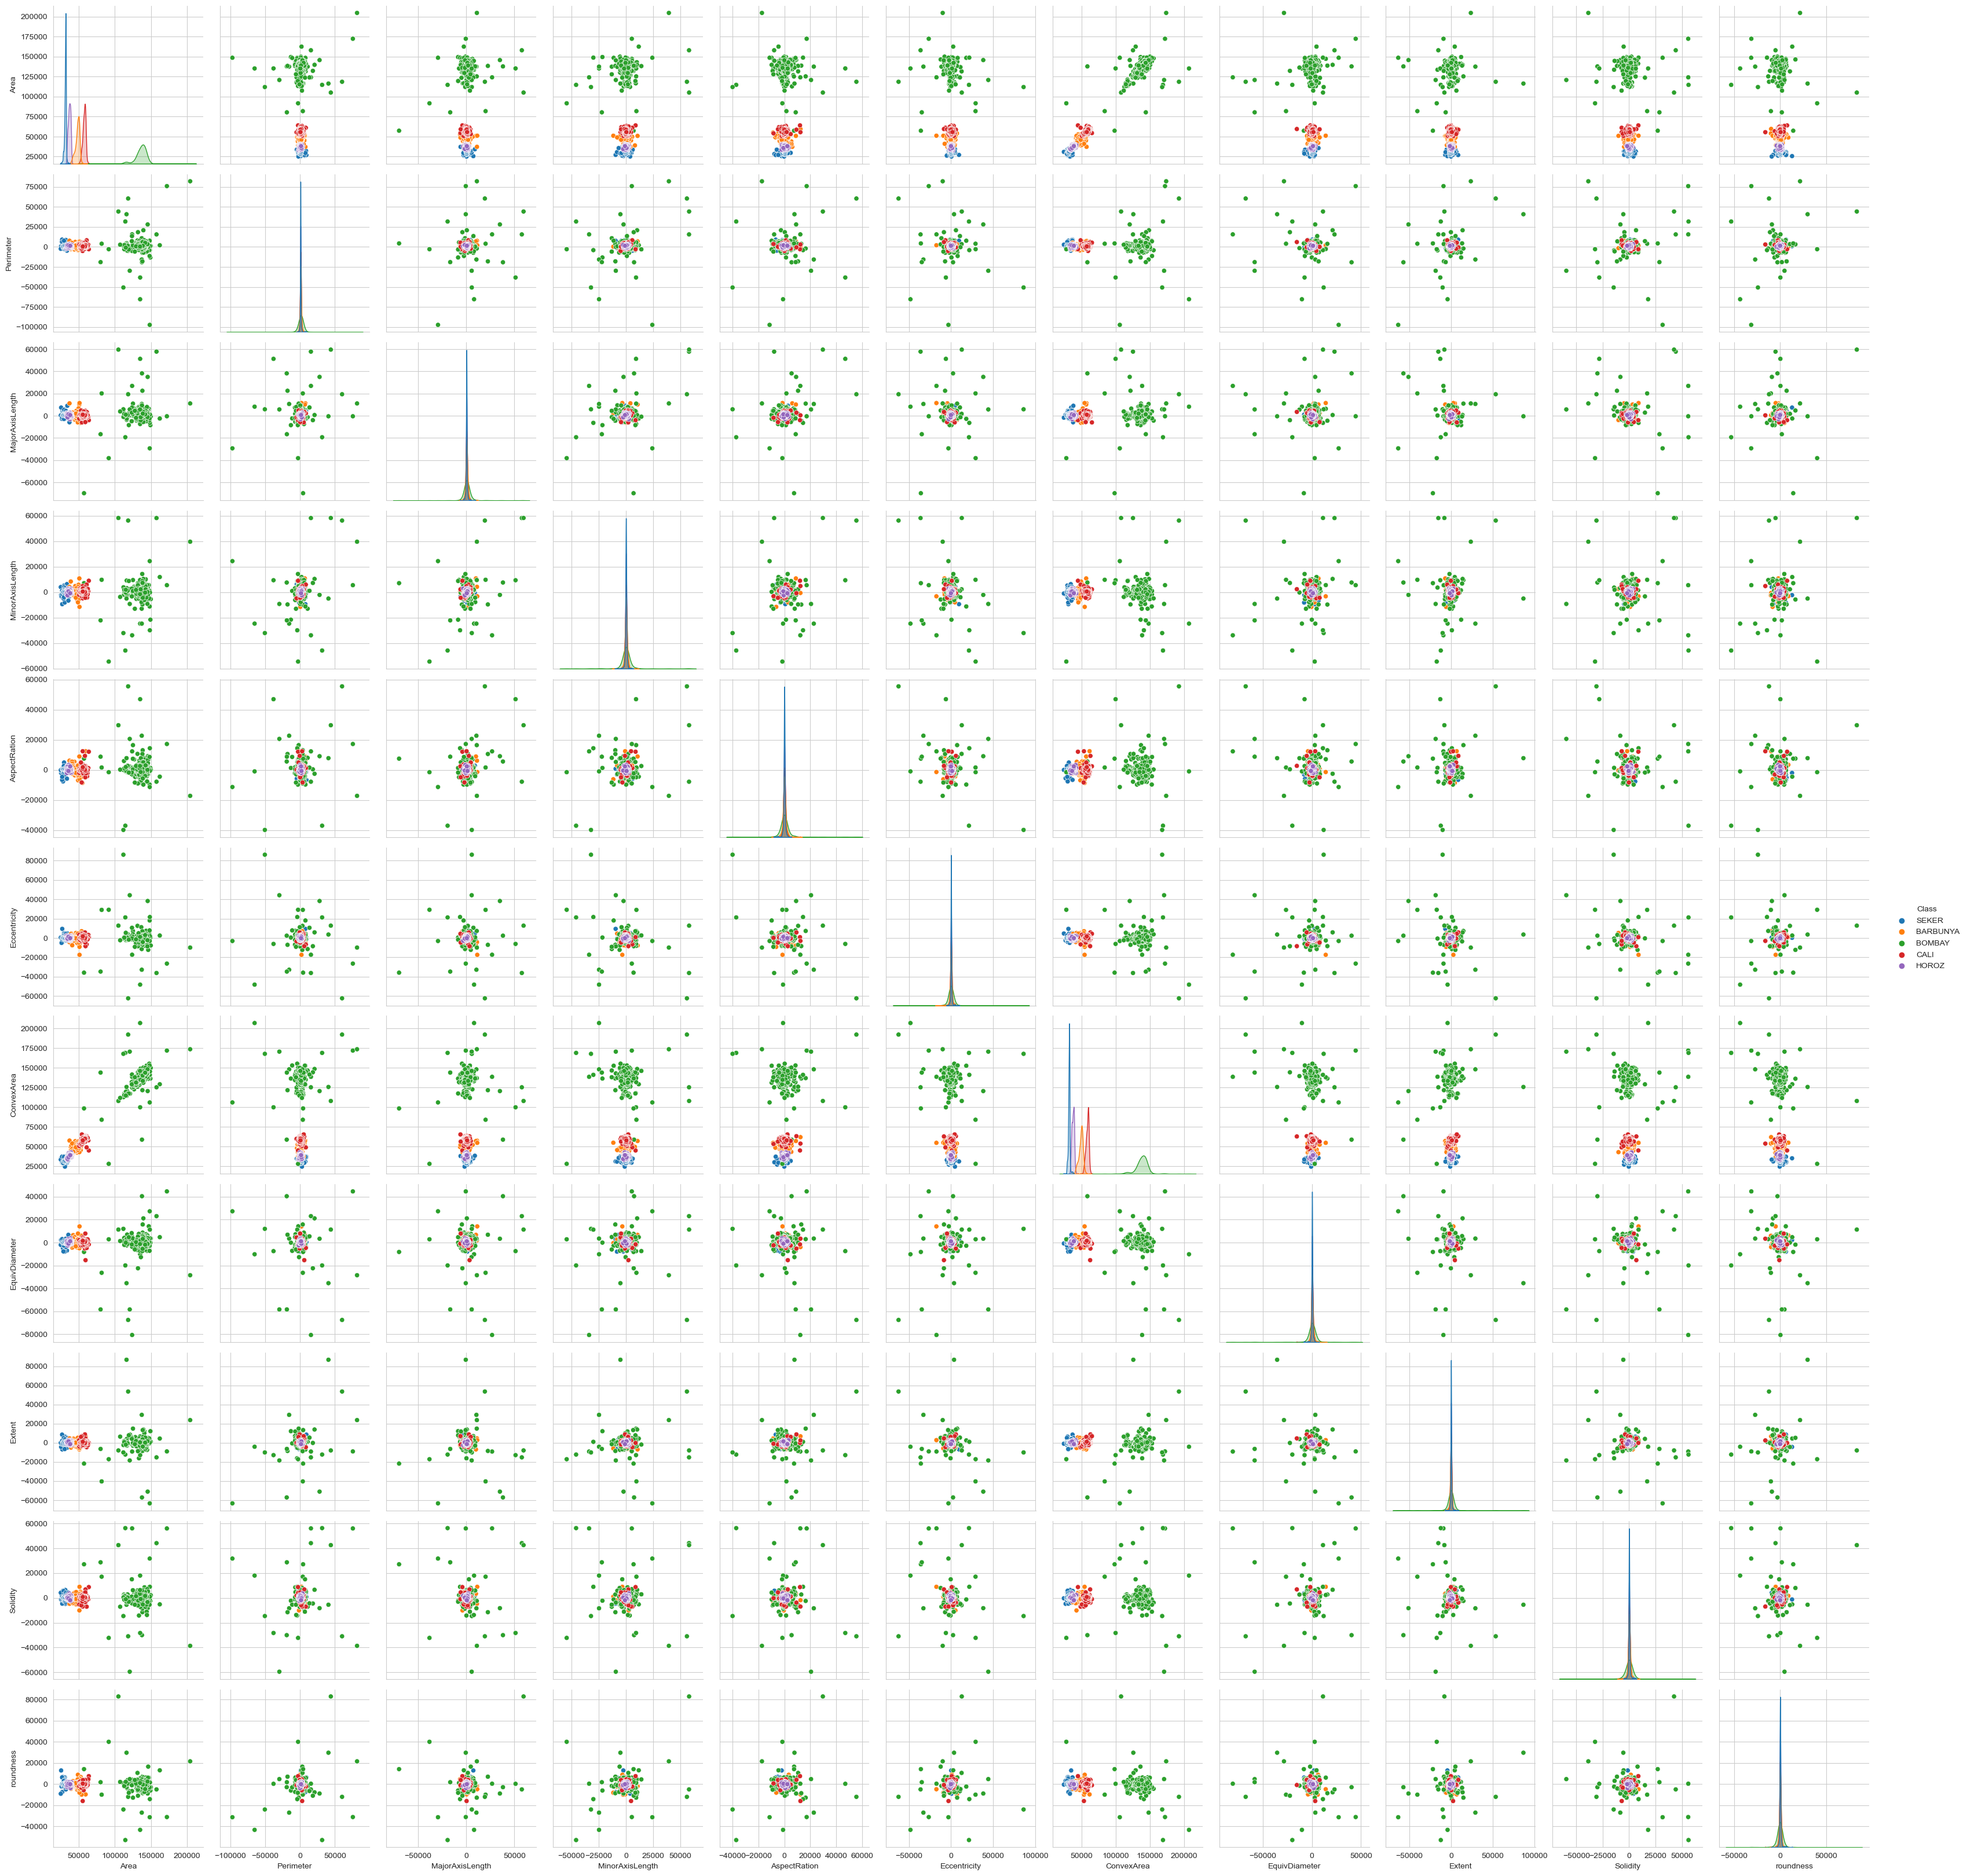

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Class",size=3);
plt.show()

In [10]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


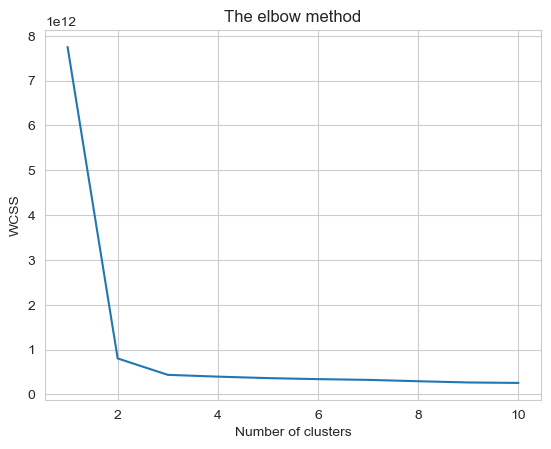

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

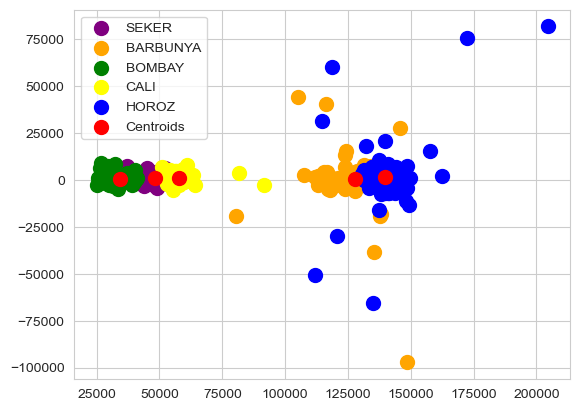

In [13]:
# iris_1=iris.loc[iris["Class"]=="SEKER"]
# iris_2=iris.loc[iris["Class"]=="BARBUNYA"]
# iris_3=iris.loc[iris["Class"]=="BOMBAY"]
# iris_4=iris.loc[iris["Class"]=="CALI"]
# iris_5=iris.loc[iris["Class"]=="HOROZ"]
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'SEKER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BARBUNYA')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'BOMBAY')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'CALI')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'HOROZ')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

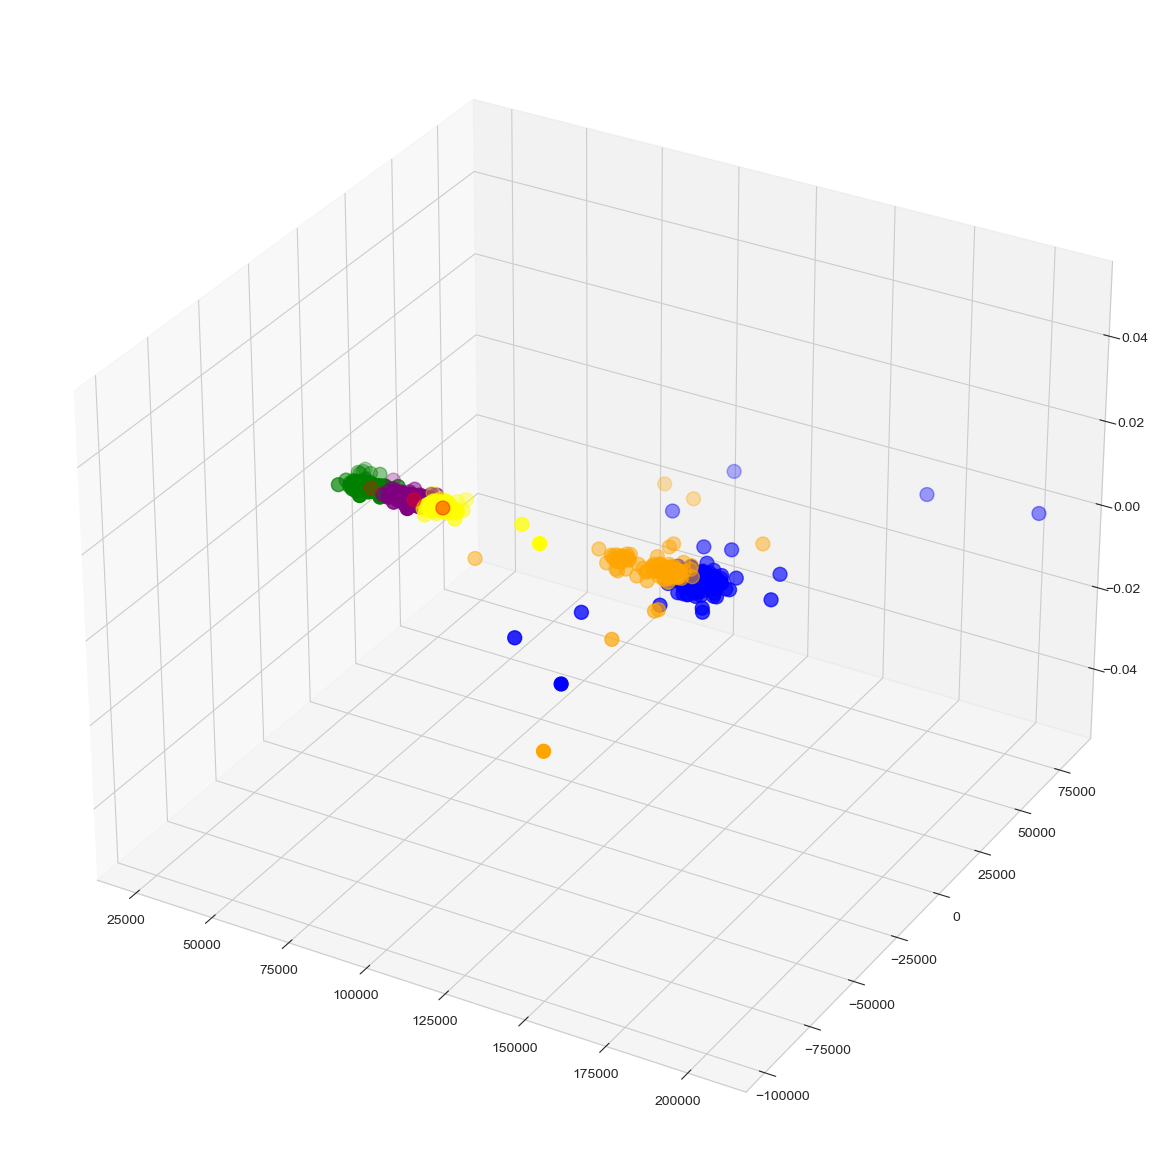

In [14]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
# plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'SEKER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BARBUNYA')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'BOMBAY')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'CALI')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'HOROZ')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()